<a href="https://colab.research.google.com/github/Vinay-Yadav01/Learning-ML/blob/main/P18(K_Means_Clustering_Algorithm).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


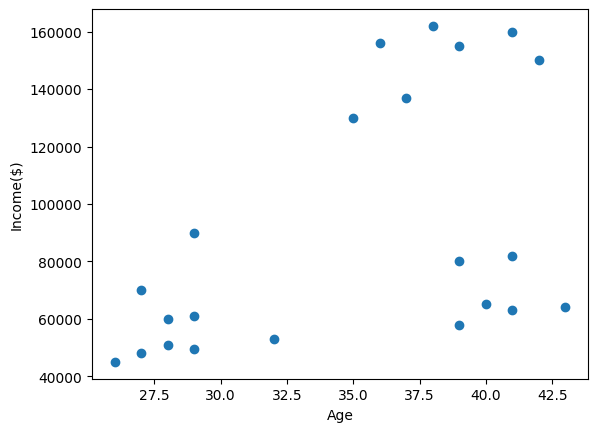

In [7]:
plt.scatter(df['Age'], df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.show()

In [8]:
model = KMeans(n_clusters=3)

In [10]:
df = df.drop('Name', axis=1)

In [15]:
y_predicted = model.fit_predict(df)
y_predicted

array([0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [16]:
df['Cluster'] = y_predicted
df.head()

,Age,Income($),Cluster
0,27,70000,0
1,29,90000,2
2,29,61000,0
3,28,60000,0
4,42,150000,1


Text(0, 0.5, 'Income($)')

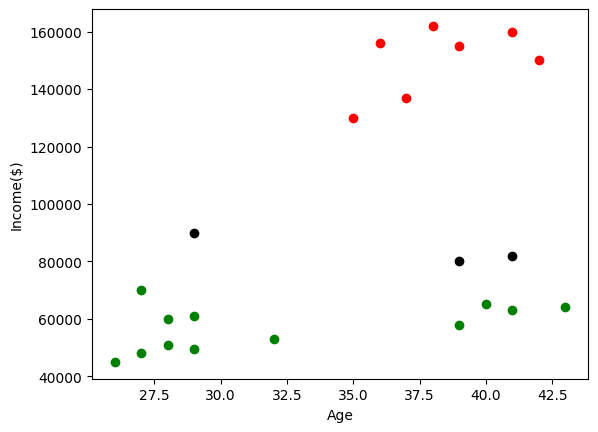

In [19]:
df0 = df[df.Cluster == 0]
df1 = df[df.Cluster == 1]
df2 = df[df.Cluster == 2]

plt.scatter(df0['Age'], df0['Income($)'], color='green')
plt.scatter(df1['Age'], df1['Income($)'], color='red')
plt.scatter(df2['Age'], df2['Income($)'], color='black')

plt.xlabel('Age')
plt.ylabel('Income($)')

In [21]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()

,Age,Income($),Cluster
0,0.058824,0.213675,0
1,0.176471,0.384615,2
2,0.176471,0.136752,0
3,0.117647,0.128205,0
4,0.941176,0.897436,1


In [22]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
df['Cluster2'] = y_predicted
df.head()

,Age,Income($),Cluster,Cluster2
0,0.058824,0.213675,0,0
1,0.176471,0.384615,2,0
2,0.176471,0.136752,0,0
3,0.117647,0.128205,0,0
4,0.941176,0.897436,1,2


Text(0, 0.5, 'Income($)')

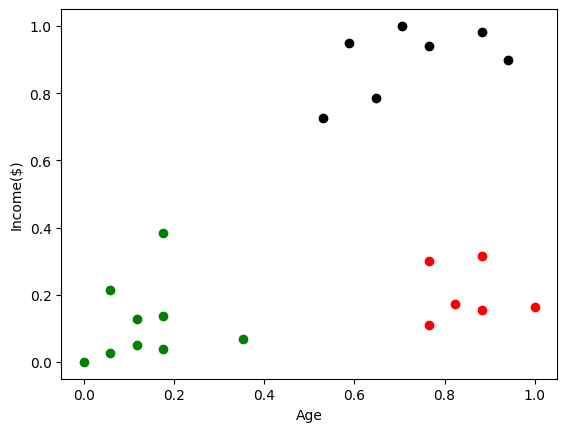

In [25]:
df0 = df[df.Cluster2 == 0]
df1 = df[df.Cluster2 == 1]
df2 = df[df.Cluster2 == 2]

plt.scatter(df0['Age'], df0['Income($)'], color='green')
plt.scatter(df1['Age'], df1['Income($)'], color='red')
plt.scatter(df2['Age'], df2['Income($)'], color='black')

plt.xlabel('Age')
plt.ylabel('Income($)')

In [26]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

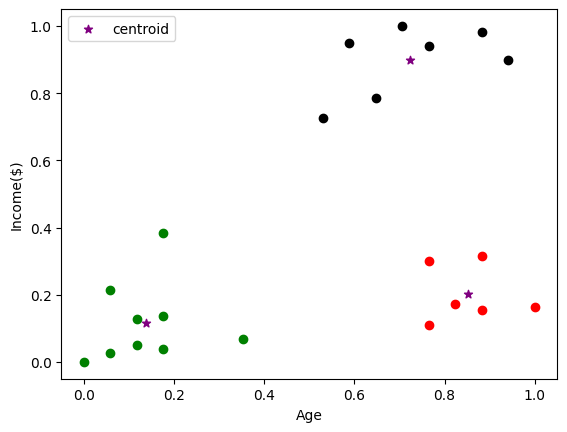

In [28]:
df0 = df[df.Cluster2 == 0]
df1 = df[df.Cluster2 == 1]
df2 = df[df.Cluster2 == 2]

plt.scatter(df0['Age'], df0['Income($)'], color='green')
plt.scatter(df1['Age'], df1['Income($)'], color='red')
plt.scatter(df2['Age'], df2['Income($)'], color='black')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

# Elbow Plot

In [29]:
sse = []
k_rng = range(1, 10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

sse

[5.434011511988176,
 2.0911363886990766,
 0.4750783498553095,
 0.4021030171918884,
 0.3071350418475291,
 0.23033548308220766,
 0.1987930359477545,
 0.15240874520774256,
 0.10740235405674733]

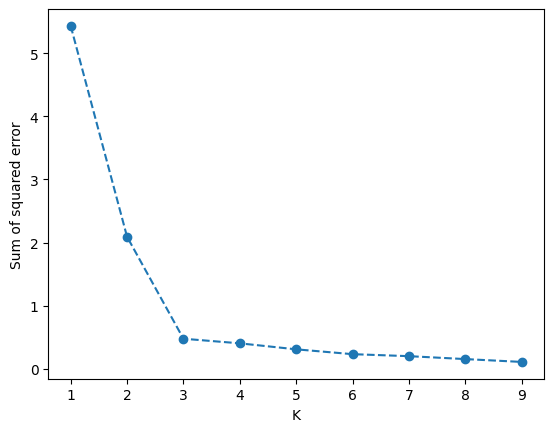

In [34]:
plt.plot(k_rng, sse, ls="--")
plt.scatter(k_rng,sse)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()